In [31]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Length of period:
len_period = 4.2 # m

# Load data from output txt file:
# file = 'trace-sim/ReferenceParticle.txt'
# file = 'Automate-G4bl/g4bl-output-sim1/ReferenceParticle.txt'
file = 'RF-test/ReferenceParticle.txt'
data = np.loadtxt(file)

# Figure directory:
dir = 'Figures/'

In [32]:
# Values along channel:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []; mod_t_vals = []
Bx_vals = []; By_vals = []; Bz_vals = []
next_z = 0; period_start_z_vals = []; period_start_indices = []
for i in range(data.shape[0]):
    x_vals.append(data[i][0]*0.1) # mm -> cm
    y_vals.append(data[i][1]*0.1)
    z = data[i][2]*0.001 # mm -> m
    z_vals.append(z) # mm -> m and add shift to fix initial offset
    px = data[i][3]; py = data[i][4]; pz = data[i][5]
    px_vals.append(px) # MeV/c
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
    t = data[i][6]
    t_vals.append(t) # ns
    mod_t = t % T
    mod_t_vals.append(mod_t)
    # Bx = data[i][12]; By = data[i][13]; Bz = data[i][14]
    Bx = data[i][12]*200; By = data[i][13]*200; Bz = data[i][14] # rescale Bx, By for plotting
    Bx_vals.append(Bx)
    By_vals.append(By)
    Bz_vals.append(Bz)
    del px, py, pz, t, Bx, By, Bz

    # Find indices for first value in each period:
    if z > next_z:
        period_start_z_vals.append(z)
        period_start_indices.append(i)
        next_z += len_period

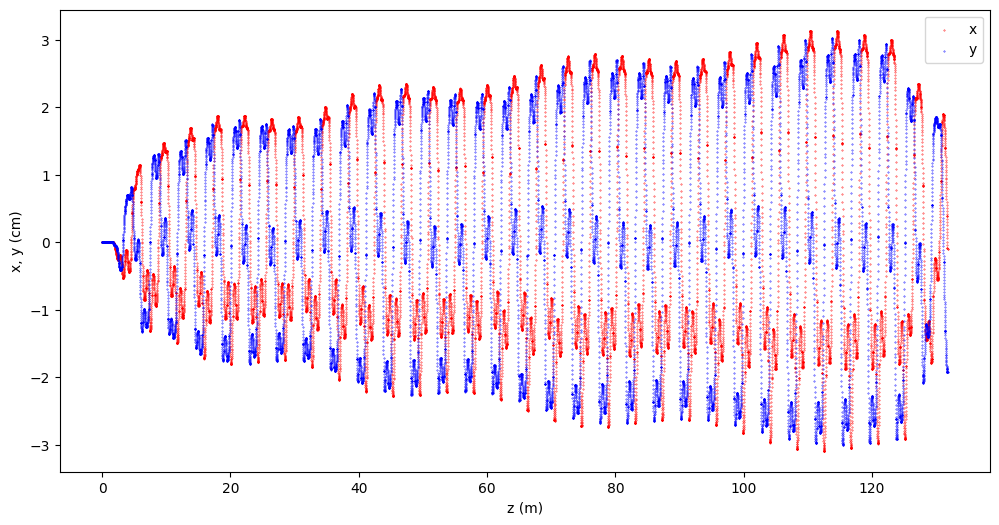

In [33]:
# Plot x, y along z:
# plt.plot(z_vals,x_vals,color='red',label='x')
# plt.plot(z_vals,y_vals,color='blue',label='y')
plt.figure(figsize = (12,6))
plt.scatter(z_vals,x_vals,color='red',label='x',s=0.1)
plt.scatter(z_vals,y_vals,color='blue',label='y',s=0.1)
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()
plt.show()

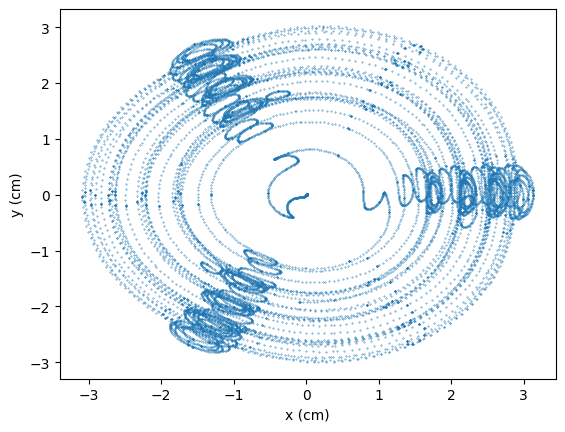

In [34]:
# Plot projection in x-y plane:
plt.figure()
# plt.plot(x_vals,y_vals)
plt.scatter(x_vals,y_vals,s=0.1)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

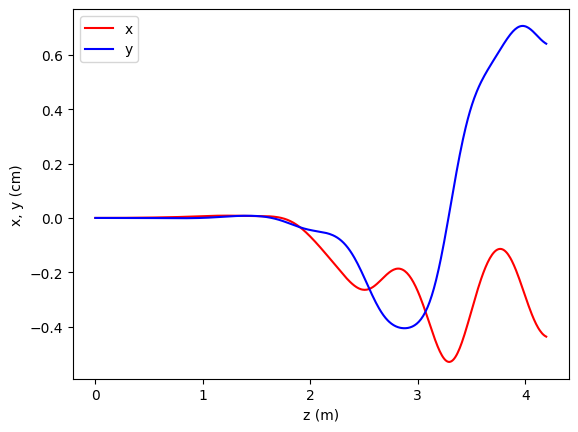

In [35]:
# Plot first period of data:
plt.figure()
end_first_period = period_start_indices[1]
plt.plot(z_vals[0:end_first_period],x_vals[0:end_first_period],color='red',label='x')
plt.plot(z_vals[0:end_first_period],y_vals[0:end_first_period],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()
plt.show()

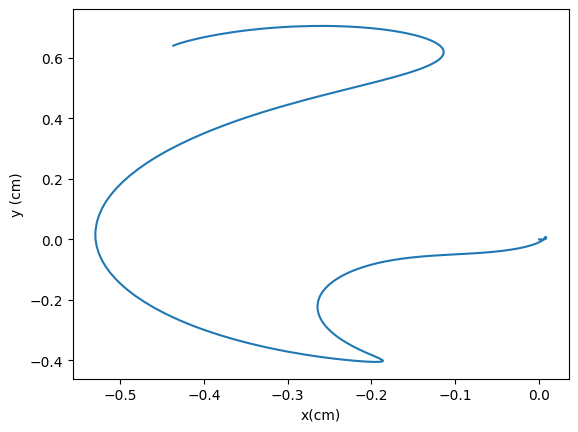

In [36]:
# Plot x-y trajectory for first period of data:
plt.figure()
plt.plot(x_vals[0:end_first_period],y_vals[0:end_first_period])
plt.xlabel('x(cm)')
plt.ylabel('y (cm)')
plt.show()

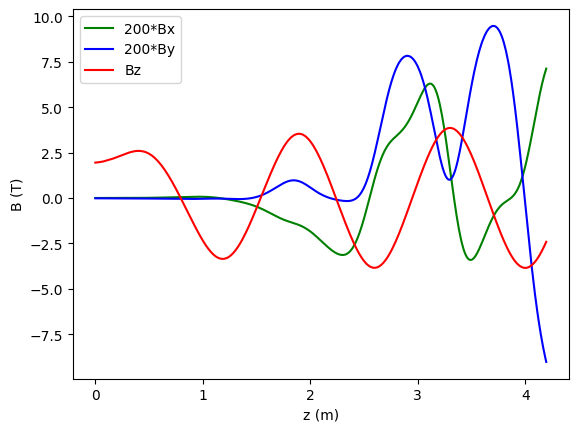

In [37]:
# Plot magnetic field for a first period of data:
plt.figure()
plt.plot(z_vals[0:end_first_period],Bx_vals[0:end_first_period],color='green',label='200*Bx')
plt.plot(z_vals[0:end_first_period],By_vals[0:end_first_period],color='blue',label='200*By')
plt.plot(z_vals[0:end_first_period],Bz_vals[0:end_first_period],color='red',label='Bz')
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

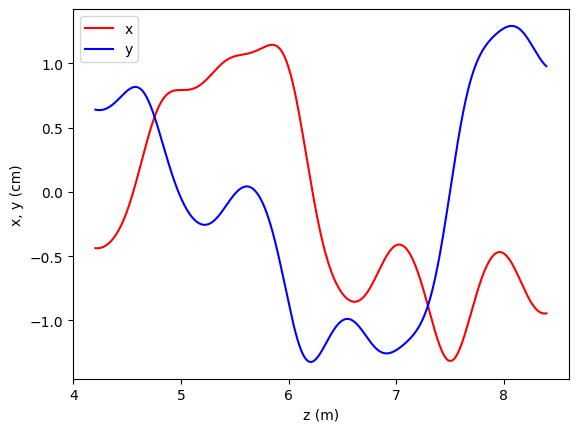

In [38]:
# Plot second period of data:
plt.figure()
end_second_period = period_start_indices[2]
plt.plot(z_vals[end_first_period:end_second_period],x_vals[end_first_period:end_second_period],color='red',label='x')
plt.plot(z_vals[end_first_period:end_second_period],y_vals[end_first_period:end_second_period],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()
plt.show()

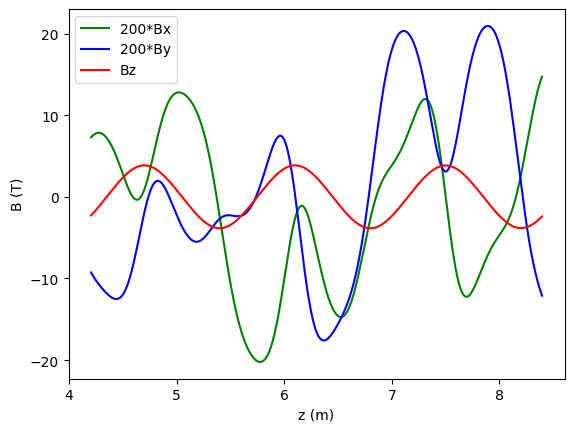

In [39]:
# Plot magnetic field for a second period of data:
plt.figure()
plt.plot(z_vals[end_first_period:end_second_period],Bx_vals[end_first_period:end_second_period],color='green',label='200*Bx')
plt.plot(z_vals[end_first_period:end_second_period],By_vals[end_first_period:end_second_period],color='blue',label='200*By')
plt.plot(z_vals[end_first_period:end_second_period],Bz_vals[end_first_period:end_second_period],color='red',label='Bz')
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

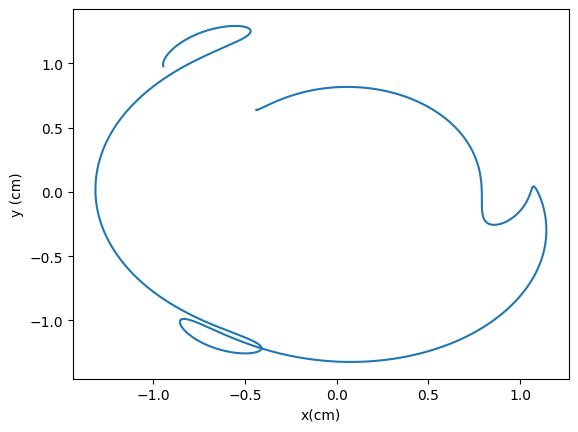

In [40]:
# Plot x-y trajectory for second period of data:
plt.figure()
plt.plot(x_vals[end_first_period:end_second_period],y_vals[end_first_period:end_second_period])
plt.xlabel('x(cm)')
plt.ylabel('y (cm)')
plt.show()

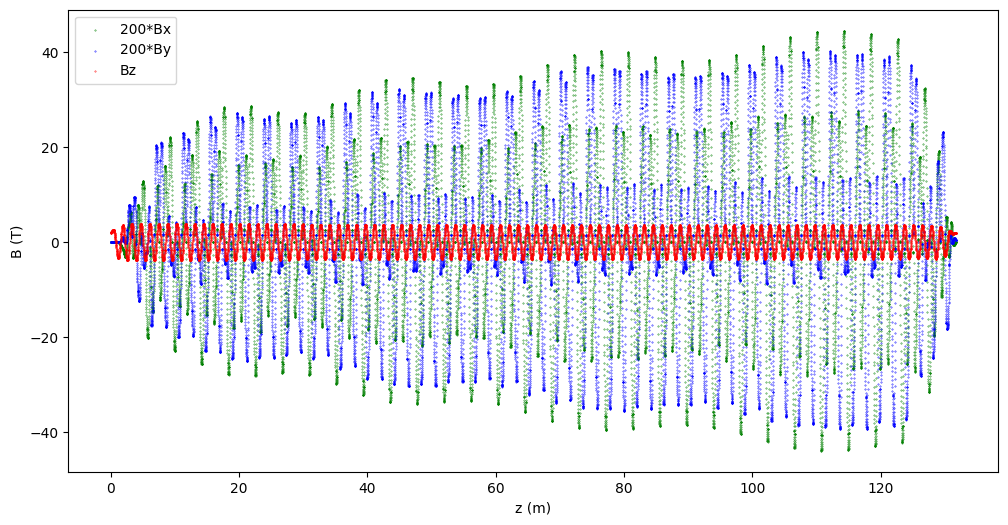

In [41]:
# Plot magnetic field for entire channel:
plt.figure(figsize = (12,6))
# plt.plot(z_vals,Bx_vals,color='green',label='200*Bx')
# plt.plot(z_vals,By_vals,color='blue',label='200*By')
# plt.plot(z_vals,Bz_vals,color='red',label='Bz')
plt.scatter(z_vals,Bx_vals,color='green',label='200*Bx',s=0.1)
plt.scatter(z_vals,By_vals,color='blue',label='200*By',s=0.1)
plt.scatter(z_vals,Bz_vals,color='red',label='Bz',s=0.1)
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

In [42]:
# Load data from paper -- for single period:
dir = '/Users/criggall/Documents/muon-cooling/'
xdata = np.genfromtxt(dir+'paper_x_vs_z.csv',delimiter=',')
xdata_x = []; xdata_z = []
for i in range(len(xdata)):
    xdata_z.append(xdata[i][0])
    xdata_x.append(xdata[i][1])
ydata = np.genfromtxt(dir+'paper_y_vs_z.csv',delimiter=',')
ydata_y = []; ydata_z = []
for i in range(len(ydata)):
    ydata_z.append(ydata[i][0])
    ydata_y.append(ydata[i][1])

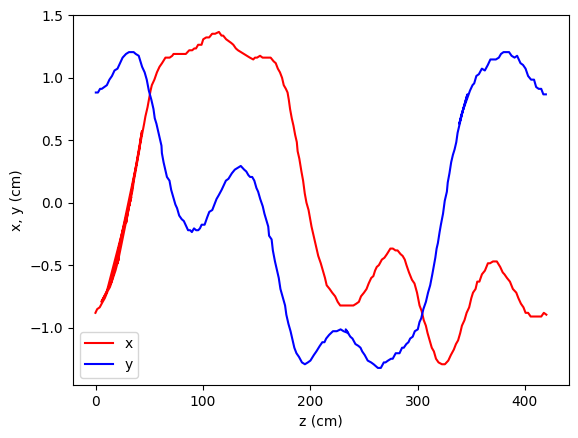

In [43]:
# Plot x, y along z from paper -- for single period:
plt.figure()
plt.plot(xdata_z,xdata_x,color='red',label='x')
plt.plot(ydata_z,ydata_y,color='blue',label='y')
# plt.plot(xdata_z,xdata_x,color='red',label='x',marker='.')
# plt.plot(ydata_z,ydata_y,color='blue',label='y',marker='.')
plt.xlabel('z (cm)')
plt.ylabel('x, y (cm)')
plt.legend()
plt.show()

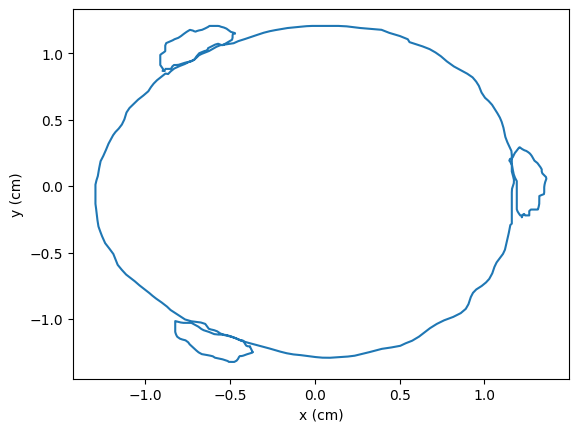

In [44]:
# Plot x-y trajeectory from paper -- for single period:
plt.figure()
num = end_second_period - end_first_period
z_range = np.linspace(0,420,round(num,1))
x_interp = np.interp(z_range,xdata_z,xdata_x)
y_interp = np.interp(z_range,ydata_z,ydata_y)
plt.plot(x_interp,y_interp)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

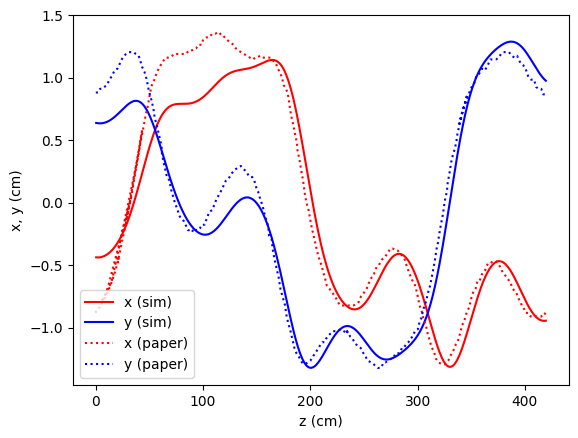

In [45]:
# Subplot trajectory for sim second period vs paper:
plt.figure()
positions = z_vals[end_first_period:end_second_period]
for i in range(len(positions)):
    positions[i] = positions[i]*100 - len_period*100
plt.plot(positions,x_vals[end_first_period:end_second_period],color='red',label='x (sim)')
plt.plot(positions,y_vals[end_first_period:end_second_period],color='blue',label='y (sim)')
plt.plot(xdata_z,xdata_x,color='red',label='x (paper)',linestyle=':')
plt.plot(ydata_z,ydata_y,color='blue',label='y (paper)',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('x, y (cm)')
plt.legend()
plt.show()

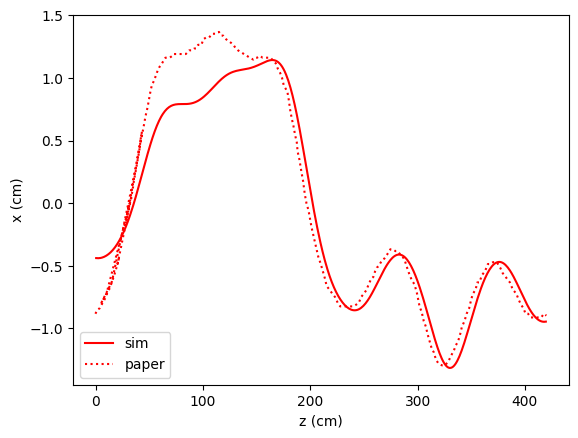

In [46]:
# Subplot trajectory for sim second period vs paper -- just x:
plt.figure()
plt.plot(positions,x_vals[end_first_period:end_second_period],color='red',label='sim')
plt.plot(xdata_z,xdata_x,color='red',label='paper',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('x (cm)')
plt.legend(loc='lower left')
plt.show()

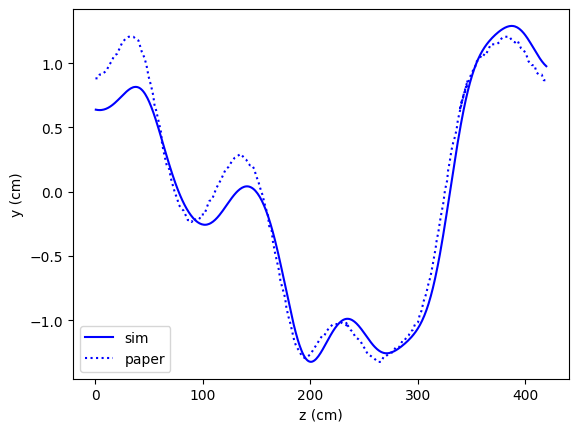

In [47]:
# Subplot trajectory for sim second period vs paper -- just y:
plt.figure()
plt.plot(positions,y_vals[end_first_period:end_second_period],color='blue',label='sim')
plt.plot(ydata_z,ydata_y,color='blue',label='paper',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('y (cm)')
plt.legend(loc='lower left')
plt.show()

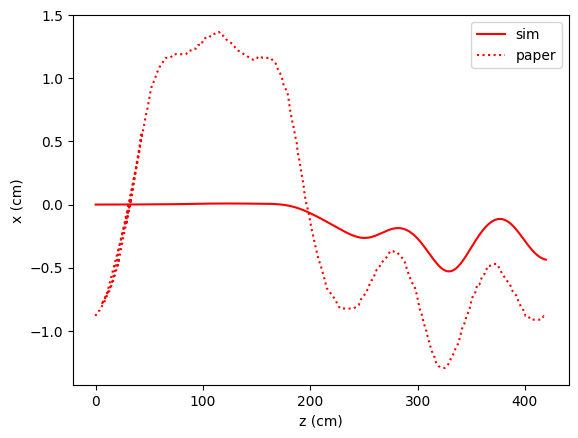

In [48]:
# Subplot trajectory for sim first period vs paper -- just x:
plt.figure()
positions = z_vals[0:end_first_period]
for i in range(len(positions)):
    positions[i] = positions[i]*100
plt.plot(positions,x_vals[0:end_first_period],color='red',label='sim')
plt.plot(xdata_z,xdata_x,color='red',label='paper',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('x (cm)')
plt.legend(loc='upper right')
plt.show()

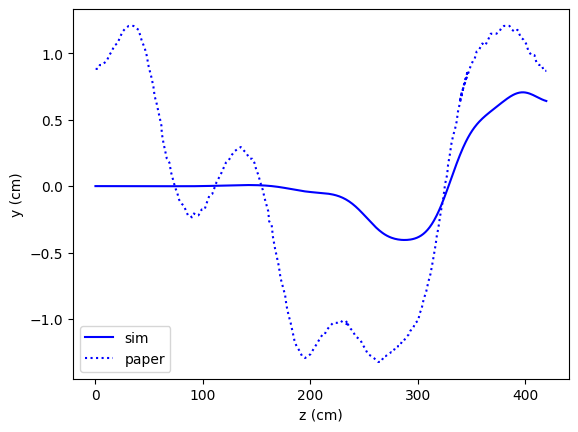

In [49]:
# Subplot trajectory for sim first period vs paper -- just y:
plt.figure()
plt.plot(positions,y_vals[0:end_first_period],color='blue',label='sim')
plt.plot(ydata_z,ydata_y,color='blue',label='paper',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('y (cm)')
plt.legend(loc='lower left')
plt.show()

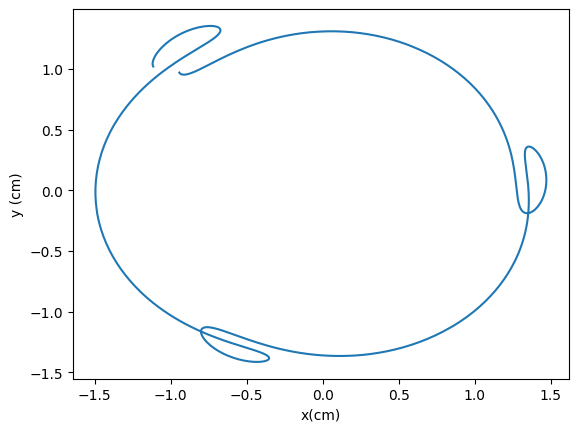

In [50]:
# Plot x-y trajectory for third period of data:
plt.figure()
end_third_period = period_start_indices[3]
plt.plot(x_vals[end_second_period:end_third_period],y_vals[end_second_period:end_third_period])
plt.xlabel('x(cm)')
plt.ylabel('y (cm)')
plt.show()

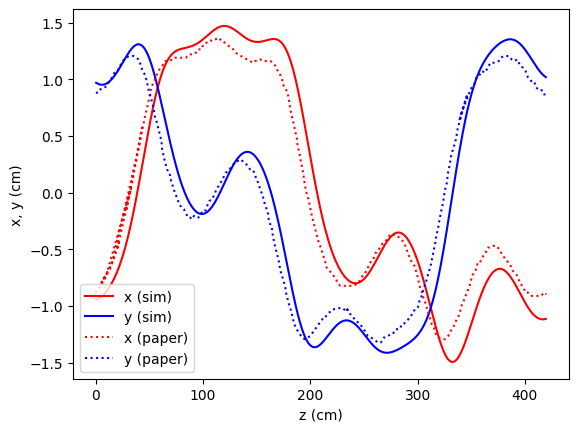

In [51]:
# Subplot trajectory for sim third period vs paper:
plt.figure()
positions = z_vals[end_second_period:end_third_period]
for i in range(len(positions)):
    positions[i] = positions[i]*100 - 2*len_period*100
plt.plot(positions,x_vals[end_second_period:end_third_period],color='red',label='x (sim)')
plt.plot(positions,y_vals[end_second_period:end_third_period],color='blue',label='y (sim)')
plt.plot(xdata_z,xdata_x,color='red',label='x (paper)',linestyle=':')
plt.plot(ydata_z,ydata_y,color='blue',label='y (paper)',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('x, y (cm)')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# Subplot trajectory for sim third period vs paper -- just x:
plt.figure()
plt.plot(positions,x_vals[end_second_period:end_third_period],color='red',label='sim')
plt.plot(xdata_z,xdata_x,color='red',label='paper',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('x (cm)')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# Subplot trajectory for sim third period vs paper -- just y:
plt.figure()
plt.plot(positions,y_vals[end_second_period:end_third_period],color='blue',label='sim')
plt.plot(ydata_z,ydata_y,color='blue',label='paper',linestyle=':')
plt.xlabel('z (cm)')
plt.ylabel('y (cm)')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# Plot phase space trajectory (x):
plt.figure()
plt.scatter(x_vals,px_vals,s=0.1)
# plt.plot(x_vals,px_vals)
plt.xlabel('x (cm)')
plt.ylabel('p_x (MeV/c)')
plt.show()

In [ ]:
# Plot phase space trajectory (y):
plt.figure()
plt.scatter(y_vals,py_vals,s=0.1)
# plt.plot(y_vals,py_vals)
plt.xlabel('y (cm)')
plt.ylabel('p_y (MeV/c)')
plt.show()

In [ ]:
# Plot in phase space once per period:
plt.figure()
x_periodic = []
px_periodic = []
z_periodic = []
for i in range(len(period_start_indices)):
    index = period_start_indices[i]
    x_periodic.append(x_vals[index])
    px_periodic.append(px_vals[index])
    z_periodic.append(z_vals[index])
# x_periodic = x_periodic[2:]
# px_periodic = px_periodic[2:]
plt.plot(x_periodic, px_periodic,marker='.')
plt.xlabel('x (cm)')
plt.ylabel('p_x (MeV/c)')
plt.show()

In [ ]:
# Plot in phase space once per period:
plt.figure()
y_periodic = []
py_periodic = []
for i in range(len(period_start_indices)):
    index = period_start_indices[i]
    y_periodic.append(y_vals[index])
    py_periodic.append(py_vals[index])
# y_periodic = y_periodic[2:]
# py_periodic = py_periodic[2:]
plt.plot(y_periodic, py_periodic,marker='.')
plt.xlabel('y (cm)')
plt.ylabel('p_y (MeV/c)')
plt.show()

In [ ]:
# 3D plot of Poincaré section (x):
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(len(x_periodic)):
    ax.scatter(z_periodic[i],x_periodic[i],px_periodic[i],color='green') # position m -> cm
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('p_x (cm)')
plt.show()

In [ ]:
# 3D plot of Poincaré section (y):
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(len(y_periodic)):
    ax.scatter(z_periodic[i],y_periodic[i],py_periodic[i],color='green') # position m -> cm
ax.set_xlabel('z (cm)')
ax.set_ylabel('y (cm)')
ax.set_zlabel('p_y (cm)')
plt.show()